<a href="https://colab.research.google.com/github/Sarith99/ML_Courses_Practicals/blob/main/ML_Practical_02_Training_First_model_Celsius_To_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Basics: Training My First Model**

The problem we will solve is to convert From Celsius to Fahrenheit, where the approximate formula is:

                f = c x 1.8 + 32

We use sample Celsius values(0, 8, 15, 22, 38) and their corresponding Fahrenheit values(32, 46, 59, 72, 100). Then we will train a model that figures out the above formula through training process.

## **Import Dependancies**

First import Tensorflow, Here we calling it tf ease of use. we also tell it to display errors.

Next, we import NumPy as np. Numpy helps us to represent our data as highly performant lists.

In [ ]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import numpy as np

## **Set up Traning Data**

***Supervised Machine Learning*** is all about figuring out an algorithm given a set of inputs and outputs. 

Here, we use Celsius data as inputs and Fahrenheit data as outputs.

In [ ]:
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degree Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degree Celsius = -40.0 degrees Fahrenheit
-10.0 degree Celsius = 14.0 degrees Fahrenheit
0.0 degree Celsius = 32.0 degrees Fahrenheit
8.0 degree Celsius = 46.0 degrees Fahrenheit
15.0 degree Celsius = 59.0 degrees Fahrenheit
22.0 degree Celsius = 72.0 degrees Fahrenheit
38.0 degree Celsius = 100.0 degrees Fahrenheit


### **Some Machine Learning Terminolgy**

 

*   **Feature -** The Input(s)to our model. In this case,single value - the derees in the Celsius.
*   **Labels -** The output our model predicts. In this case, a single value - the degrees in the Fahrenheit.
*   **Example -** A pair of inputs/outputs used during training. In our case a pair of values from celsius_q and fahrenheit_a at a specific index, such as (22, 72).








## **Create the Model**

### **Build a layer**

In [ ]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### **Assemble Layers into the model**

In [ ]:
model = tf.keras.Sequential([l0])

In [ ]:
model = tf.keras.Sequential([
   tf.keras.layers.Dense(units=1, input_shape=[1])
])

### **Compile the model, with loss and optimizer functions**

* **Loss Function** - A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)
* **Optimizer Function** - A way of adjusting internal values in order to reduce the loss.

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

### **Train the Model**

In [ ]:
history = model.fit(celsius_q, fahrenheit_a, epochs = 500, verbose = False)
print("Finished training the model")

Finished training the model


### **Display training statistics**

We'll use Matplotlib to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is near "perfect" towards the end. 

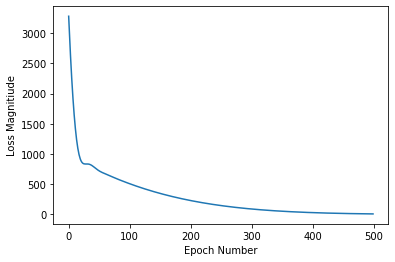

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitiude")
plt.plot(history.history["loss"])

### **Use the model to predict values**

Input 100 as Celsius value and get the Fahrenheit value as the output.

100 x 1.8 + 32 = 212 

212 must be the output.



In [ ]:
print(model.predict([100.0])) # The answer is much closer to the original answer(212)

[[211.31943]]


### **Looking at the Layer Weight**😊

The Note is in the pictures folder second lesson **6th screenshot**.

In [ ]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[-0.8612141]], dtype=float32), array([0.], dtype=float32)]


### **A Little Experiment**

Just for fun, we created Dense layer with different unit.(Therefore model has more variables)

In [ ]:
l0 =  tf.keras.layers.Dense(units = 4, input_shape = [1])
l1 = tf.keras.layers.Dense(units = 4)
l2 = tf.keras.layers.Dense(units = 1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0,1))
model.fit(celsius_q, fahrenheit_a, epochs = 500, verbose = False)
print("Finished Training the Model")
print(model.predict([100.0]))
print("Model Predict that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished Training the Model
[[nan]]
Model Predict that 100 degrees Celsius is: [[nan]] degrees Fahrenheit
These are the l0 variables: [array([[nan, nan, nan, nan]], dtype=float32), array([nan, nan, nan, nan], dtype=float32)]
These are the l1 variables: [array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]], dtype=float32), array([nan, nan, nan, nan], dtype=float32)]
These are the l2 variables: [array([[nan],
       [nan],
       [nan],
       [nan]], dtype=float32), array([nan], dtype=float32)]
